# Exploratory Analysis of the fMRI data

In [28]:
import os
import glob

import numpy as np

import matplotlib.pyplot as plt

In [29]:
%matplotlib inline

In [30]:
plt.rcParams['font.size'] = 16.0

In [31]:
ls /global/cscratch1/sd/yanzhang/data_brain

data_info           generate_snippet.ipynb
data_info~          image03/
fmri/               readimage4d.py
fmri_numpy_380/     readimage4d_saveSingle.py
fmri_numpy_383/     readimage4d_saveSingle.py~
fmri_numpy_others/  readimage4d_saveSingle_2.py
fmri_snippet_380/   readimage4d_saveSingle_2.py~
fmri_unzipped/      validation_fluid_intelligenceV1.csv*


In [32]:
data_dir = '/global/cscratch1/sd/yanzhang/data_brain/fmri_numpy_380'

In [33]:
ls -l -h $data_dir | head

total 503G
-rw-rw-r-- 1 yanzhang yanzhang 705M May 20 04:31 sub-NDARINV007W6H7B_ses-baselineYear1Arm1_task-rest_run-04_bold.npy
-rw-rw-r-- 1 yanzhang yanzhang 705M May 20 03:17 sub-NDARINV00U4FTRU_ses-baselineYear1Arm1_task-rest_run-04_bold.npy
-rw-rw-r-- 1 yanzhang yanzhang 705M May 20 03:58 sub-NDARINV0191C80U_ses-baselineYear1Arm1_task-rest_run-02_bold.npy
-rw-rw-r-- 1 yanzhang yanzhang 705M May 20 05:09 sub-NDARINV01ELX9L6_ses-baselineYear1Arm1_task-rest_run-02_bold.npy
-rw-rw-r-- 1 yanzhang yanzhang 705M May 20 04:40 sub-NDARINV02WP3TP6_ses-baselineYear1Arm1_task-rest_run-03_bold.npy
-rw-rw-r-- 1 yanzhang yanzhang 705M May 20 04:42 sub-NDARINV03BDCNWM_ses-baselineYear1Arm1_task-rest_run-03_bold.npy
-rw-rw-r-- 1 yanzhang yanzhang 705M May 20 02:28 sub-NDARINV03XVEBPM_ses-baselineYear1Arm1_task-rest_run-04_bold.npy
-rw-rw-r-- 1 yanzhang yanzhang 705M May 20 05:21 sub-NDARINV056V9RRJ_ses-baselineYear1Arm1_task-rest_run-04_bold.npy
-rw-rw-r-- 1 yanzhang yanzhang 705M May 20 03:10 sub-

In [34]:
files = glob.glob(os.path.join(data_dir, 'sub-*.npy'))

In [40]:
# Load a fixed number of files, randomly sampled
n_samples = 8

In [41]:
sampled_files = np.random.choice(files, size=n_samples)

In [43]:
data = np.stack([np.load(f) for f in sampled_files])

In [44]:
data.shape

(8, 90, 90, 60, 380)

## Voxel spectrum

In [50]:
data.min(), data.max(), data.mean()

(0.0, 45303.215, 2784.7349)

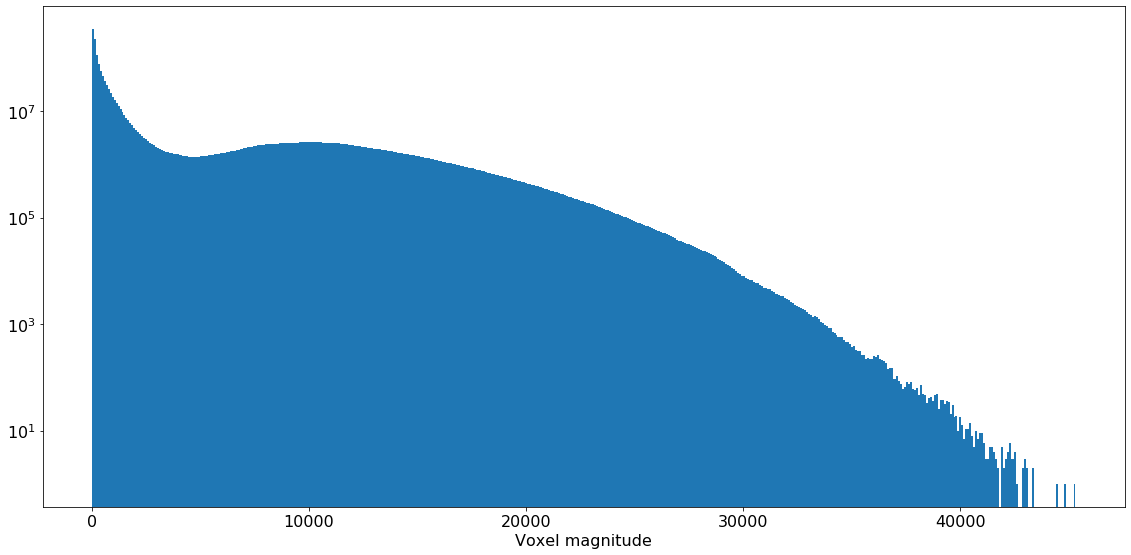

In [51]:
plt.figure(figsize=(16,8))
plt.hist(data.flatten(), bins=500, log=True)
plt.xlabel('Voxel magnitude')
plt.tight_layout()

In [52]:
print('Fraction of voxels with nonzero values:', (data[0] > 1e-7).mean())

Fraction of voxels with nonzero values: 0.9294054201862681


## 2D slices

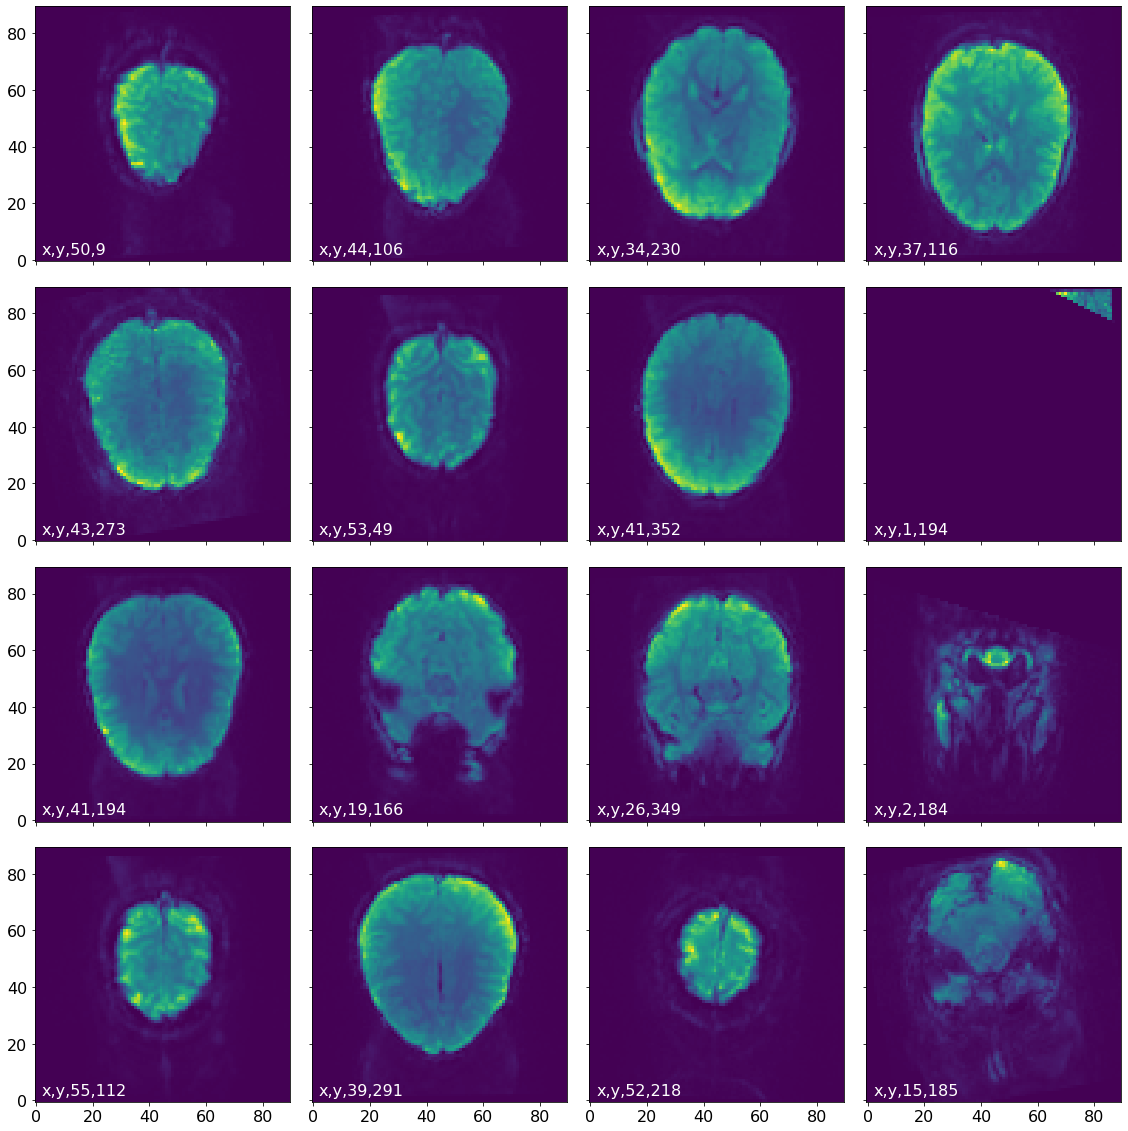

In [86]:
# Uniformly sample x-y slices
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(16, 16),
                        sharex=True, sharey=True)

for ax in axs.flatten():
    i = np.random.randint(data.shape[0])
    z = np.random.randint(data.shape[3])
    t = np.random.randint(data.shape[4])
    ax.imshow(data[i, :, :, z, t].T, origin='lower')
    ax.text(2, 2, f'x,y,{z},{t}', color='white')
    
plt.tight_layout()

It's difficult to see features in the X-Z and Y-Z slices, so I'm suppressing these ones until we have the full samples.

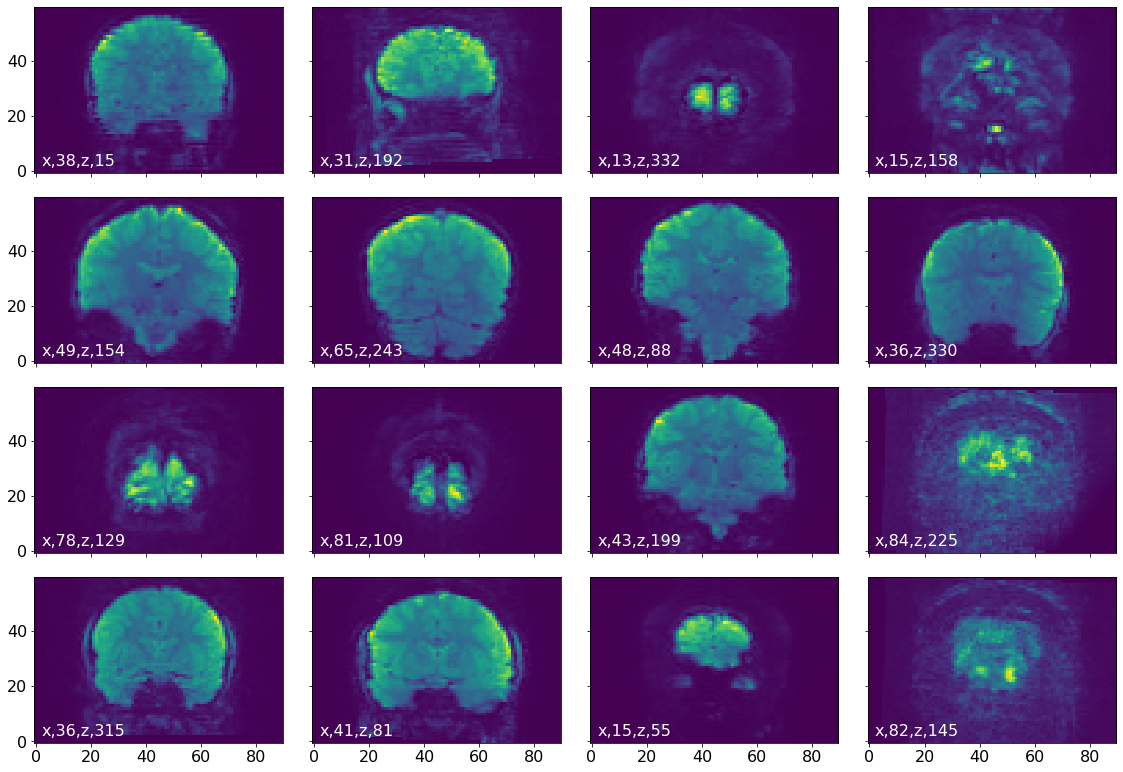

In [94]:
# Uniformly sample x-z slices
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(16, 11),
                        sharex=True, sharey=True)

for ax in axs.flatten():
    i = np.random.randint(data.shape[0])
    y = np.random.randint(data.shape[2])
    t = np.random.randint(data.shape[4])
    ax.imshow(data[i, :, y, :, t].T, origin='lower')
    ax.text(2, 2, f'x,{y},z,{t}', color='white')

plt.tight_layout()

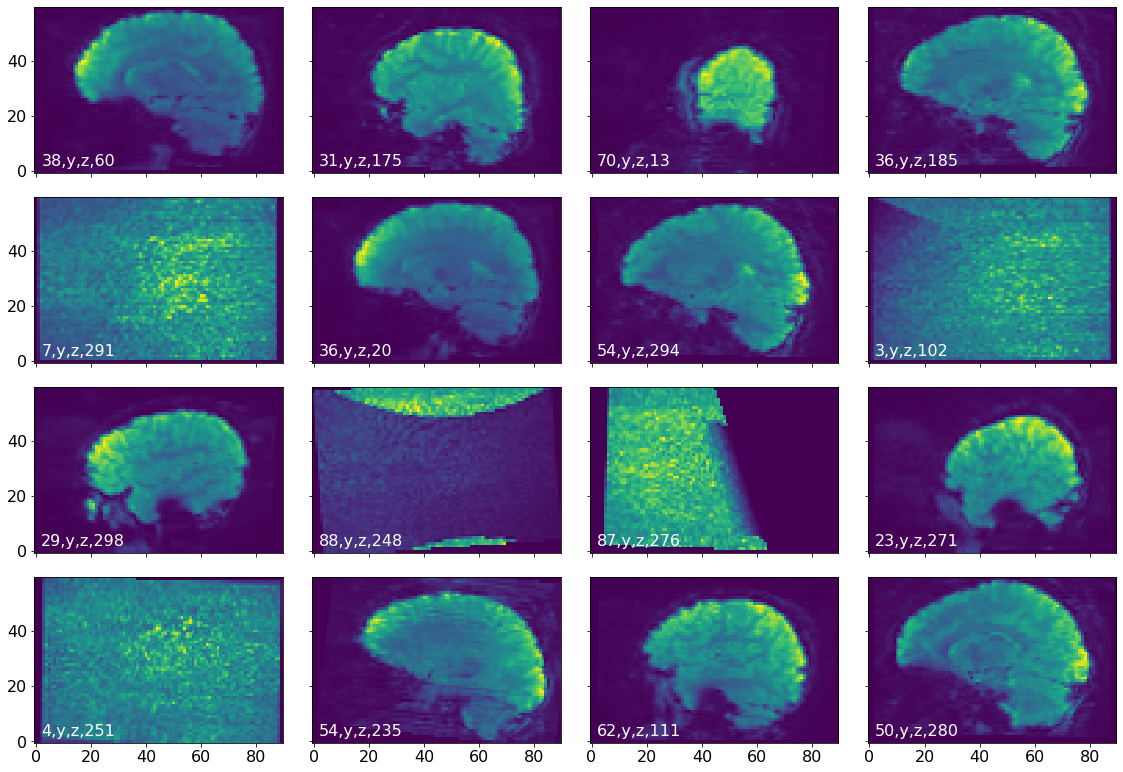

In [95]:
# Uniformly sample y-z slices
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(16, 11),
                        sharex=True, sharey=True)

for ax in axs.flatten():
    i = np.random.randint(data.shape[0])
    x = np.random.randint(data.shape[1])
    t = np.random.randint(data.shape[4])
    ax.imshow(data[i, x, :, :, t].T, origin='lower')
    ax.text(2, 2, f'{x},y,z,{t}', color='white')

plt.tight_layout()

## 2D projections, time sliced

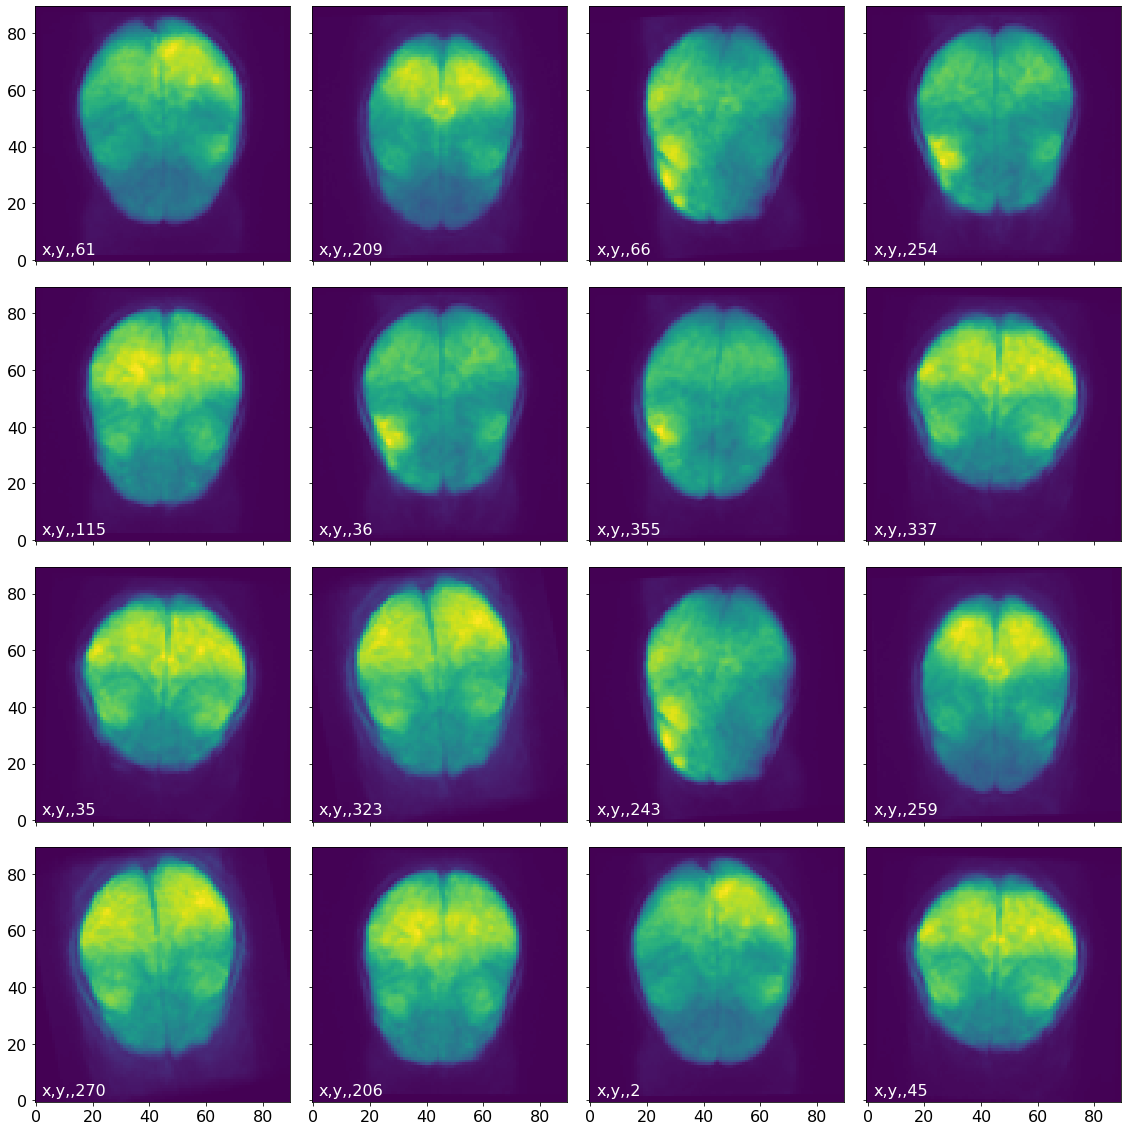

In [96]:
# X-Y projection
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(16, 16),
                        sharex=True, sharey=True)

for ax in axs.flatten():
    i = np.random.randint(data.shape[0])
    t = np.random.randint(data.shape[4])
    ax.imshow(data[i, :, :, :, t].sum(axis=2).T, origin='lower')
    ax.text(2, 2, f'x,y,,{t}', color='white')
    
plt.tight_layout()

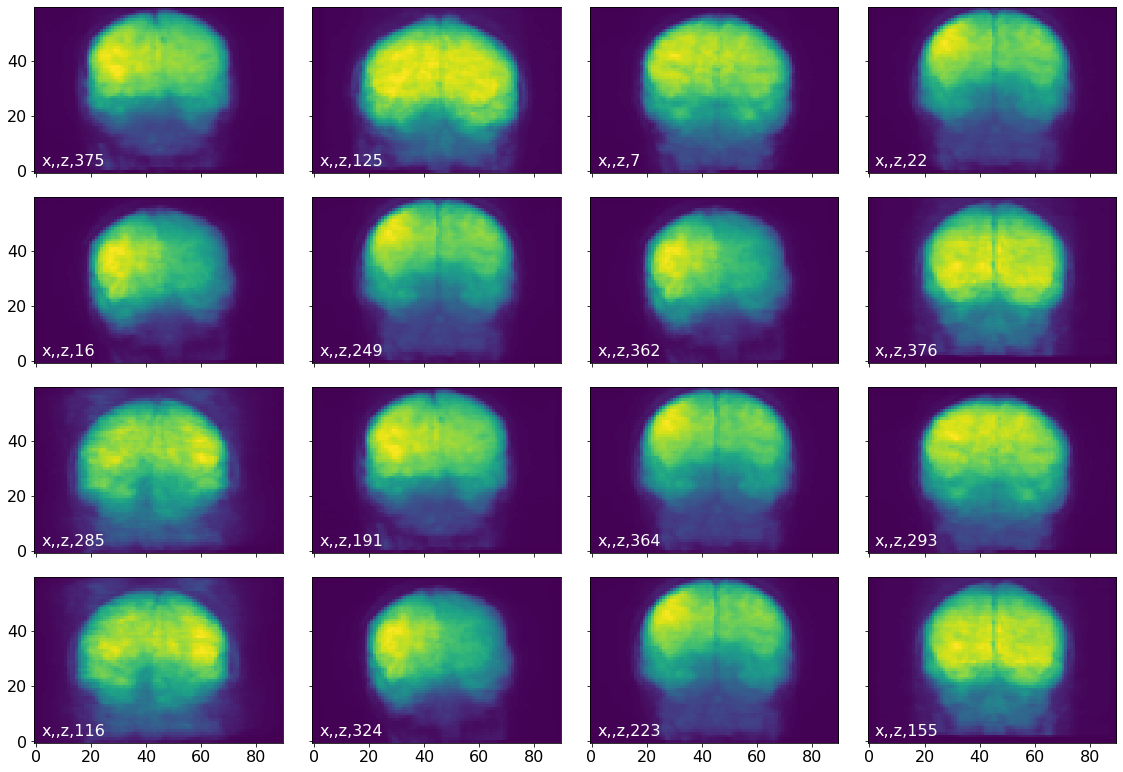

In [98]:
# X-Z projection
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(16, 11),
                        sharex=True, sharey=True)

for ax in axs.flatten():
    i = np.random.randint(data.shape[0])
    t = np.random.randint(data.shape[4])
    ax.imshow(data[i, :, :, :, t].sum(axis=1).T, origin='lower')
    ax.text(2, 2, f'x,,z,{t}', color='white')
    
plt.tight_layout()

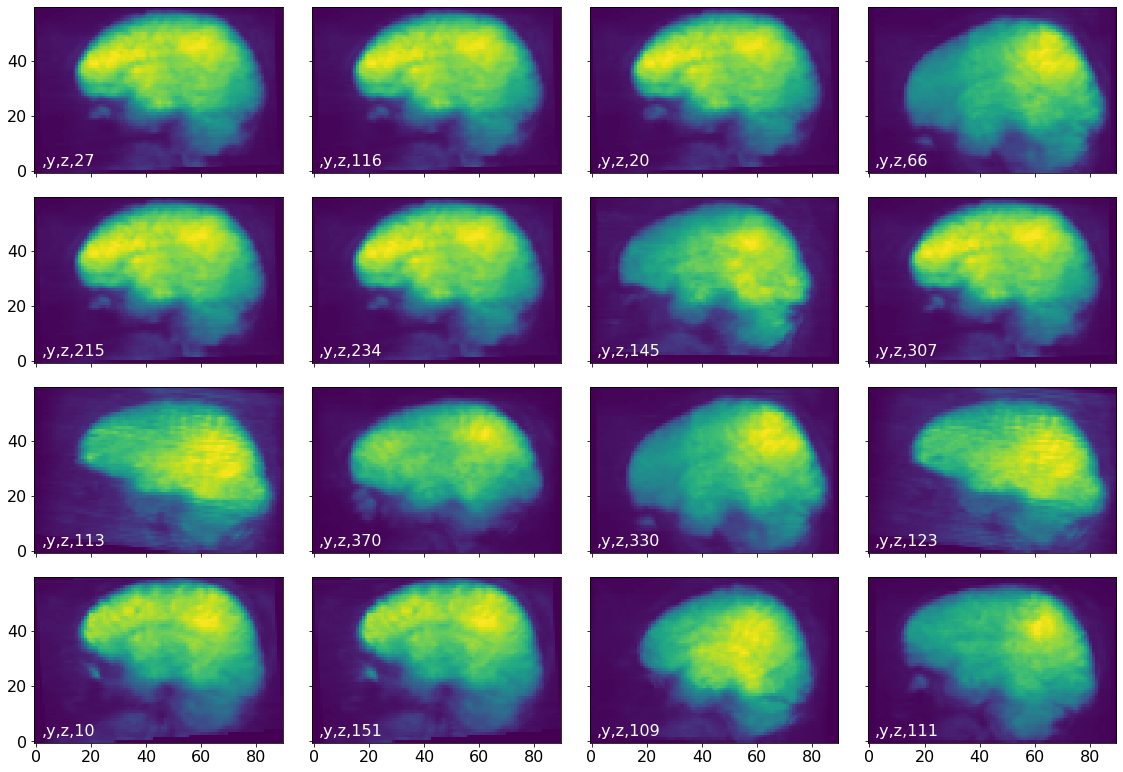

In [99]:
# Y-Z projection
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(16, 11),
                        sharex=True, sharey=True)

for ax in axs.flatten():
    i = np.random.randint(data.shape[0])
    t = np.random.randint(data.shape[4])
    ax.imshow(data[i, :, :, :, t].sum(axis=0).T, origin='lower')
    ax.text(2, 2, f',y,z,{t}', color='white')
    
plt.tight_layout()

## 2D projections, time-projected

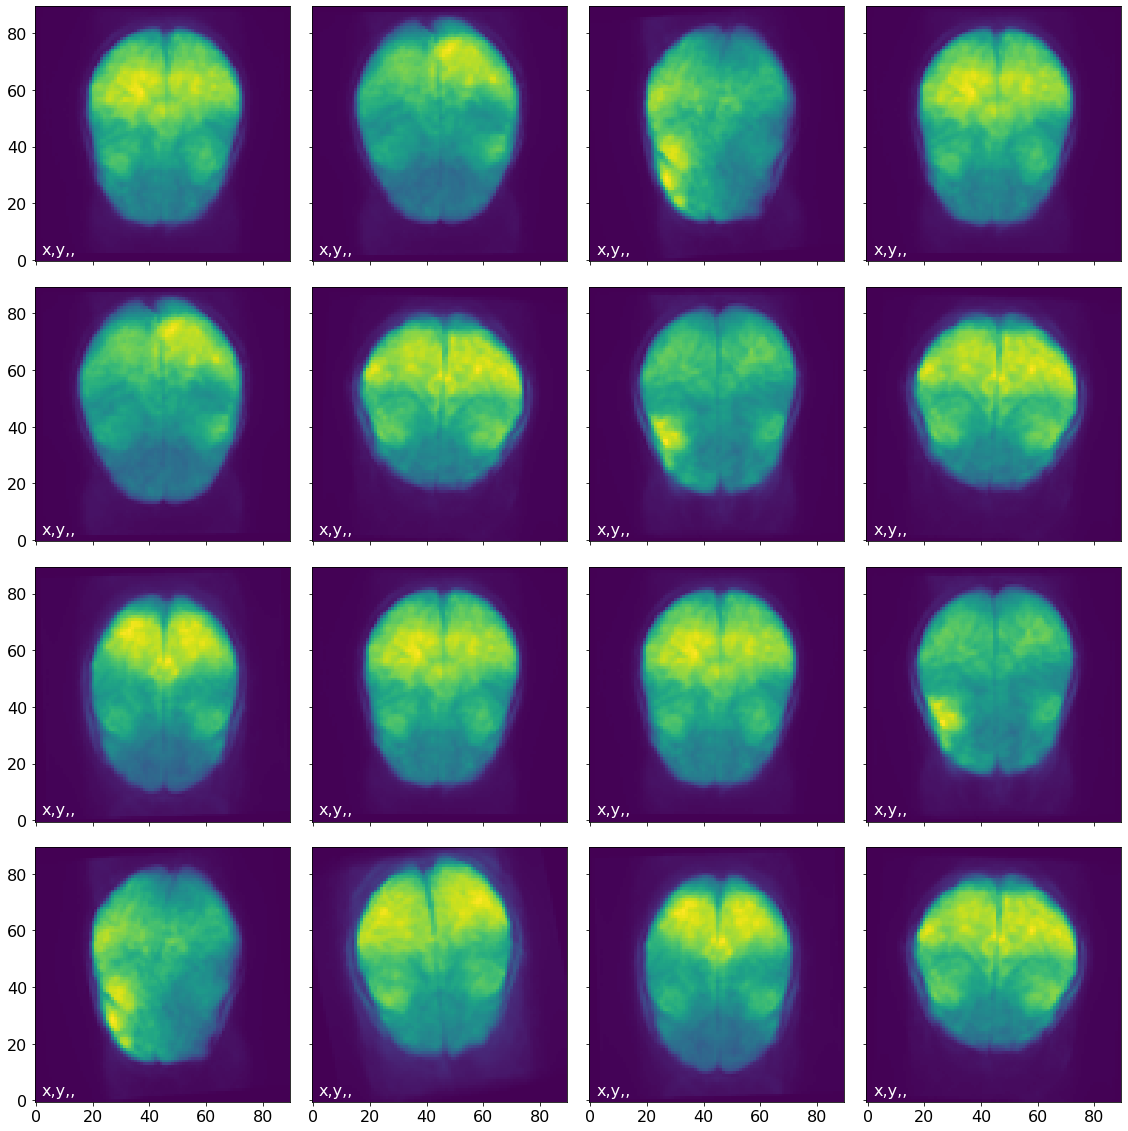

In [102]:
# X-Y projection
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(16, 16),
                        sharex=True, sharey=True)

for ax in axs.flatten():
    i = np.random.randint(data.shape[0])
    ax.imshow(data[i].sum(axis=(2,3)).T, origin='lower')
    ax.text(2, 2, f'x,y,,', color='white')    
    
plt.tight_layout()

## 2D projections, time unrolled

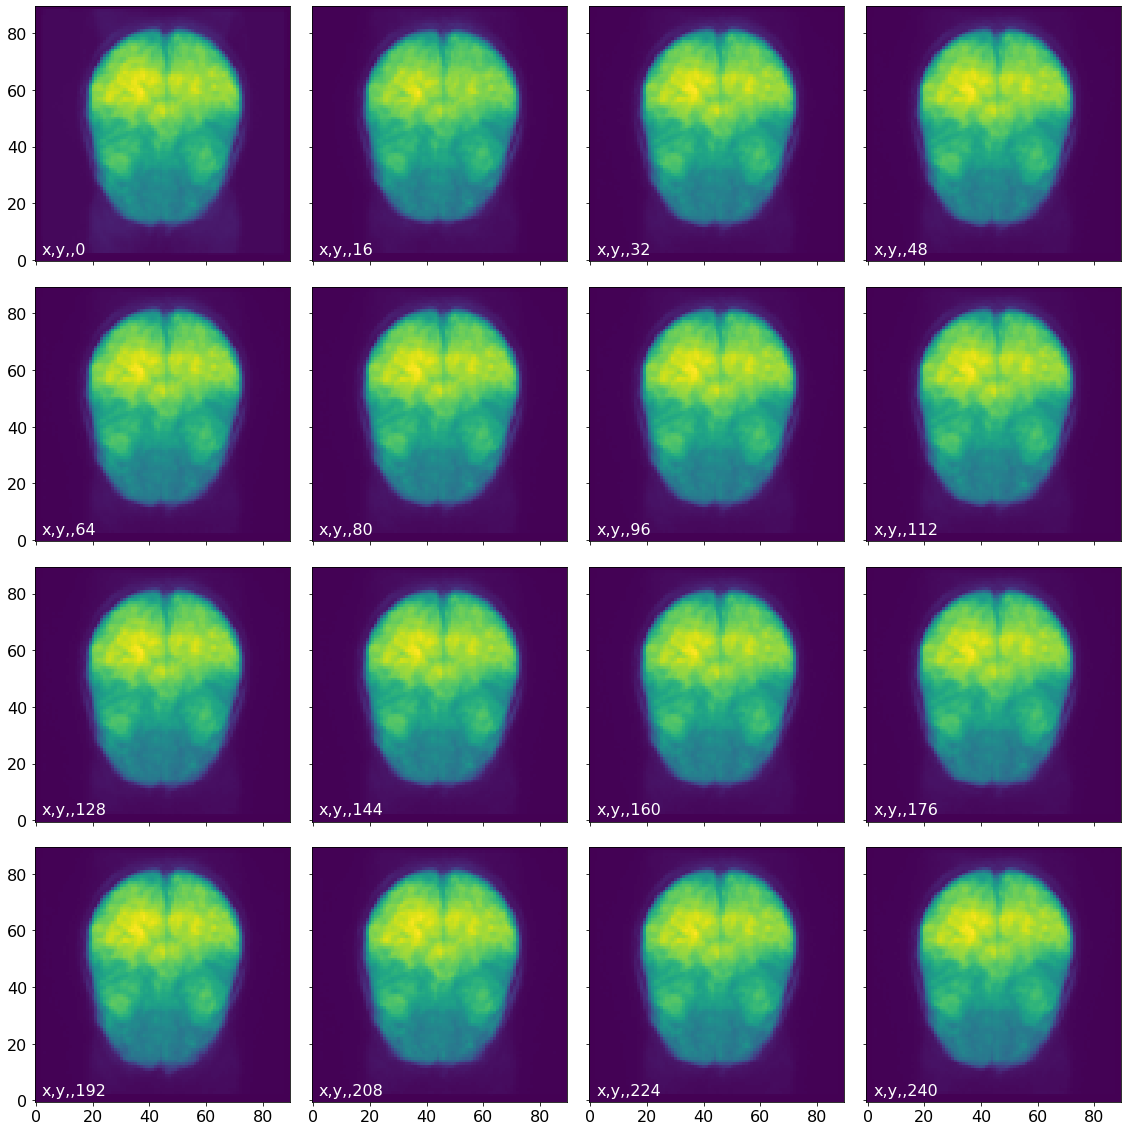

In [103]:
# X-Y projection
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(16, 16),
                        sharex=True, sharey=True)
i = np.random.randint(data.shape[0])
#z = 4

for t, ax in enumerate(axs.flatten()):
    # Taking 16-frame timesteps to try and see long term variations
    ax.imshow(data[i, :, :, :, t*16].sum(axis=2).T, origin='lower')
    ax.text(2, 2, f'x,y,,{t*16}', color='white')

    # Z slice instead of projection
    #ax.imshow(data[i, :, :, z, t*16])
    
plt.tight_layout()

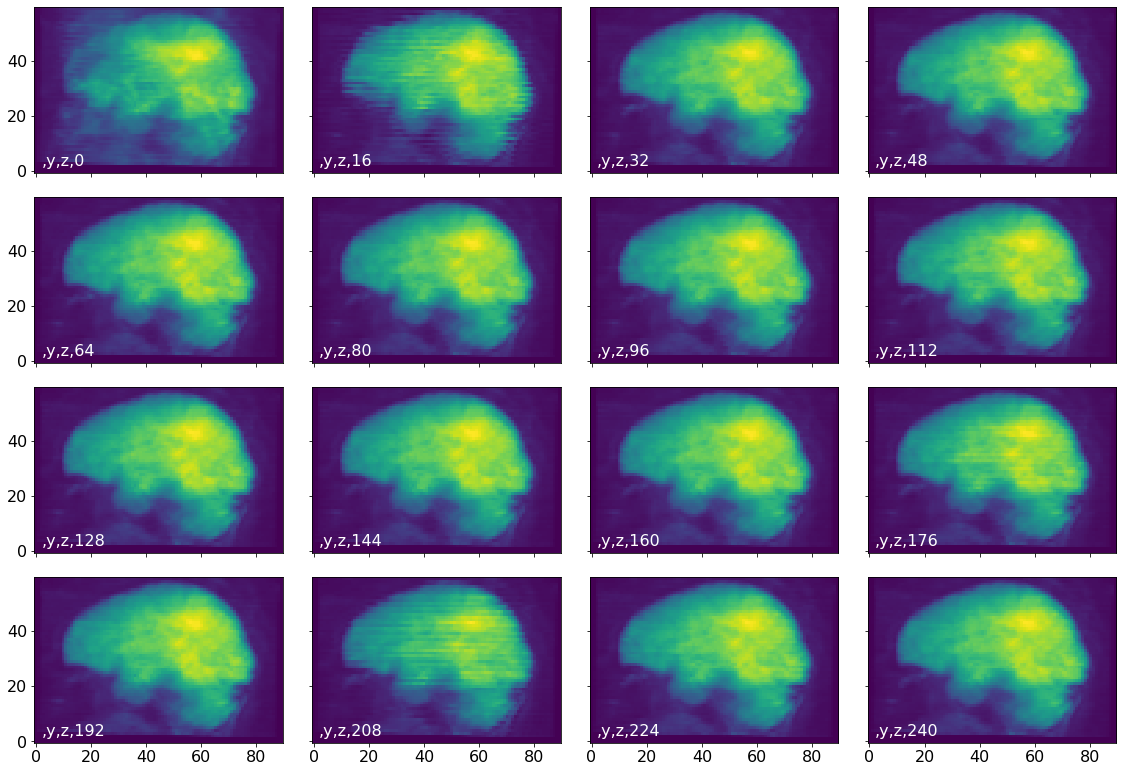

In [105]:
# Y-Z projection
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(16, 11),
                        sharex=True, sharey=True)
i = np.random.randint(data.shape[0])

for t, ax in enumerate(axs.flatten()):
    # Taking 16-frame timesteps to try and see long term variations
    ax.imshow(data[i, :, :, :, t*16].sum(axis=0).T, origin='lower')
    ax.text(2, 2, f',y,z,{t*16}', color='white')
    
plt.tight_layout()

We can't see much variation in time here, even when I take large timesteps.

I wonder if the changes are just hidden because of the massive tails of the spectrum... Maybe I can see time variations in the log of the data.

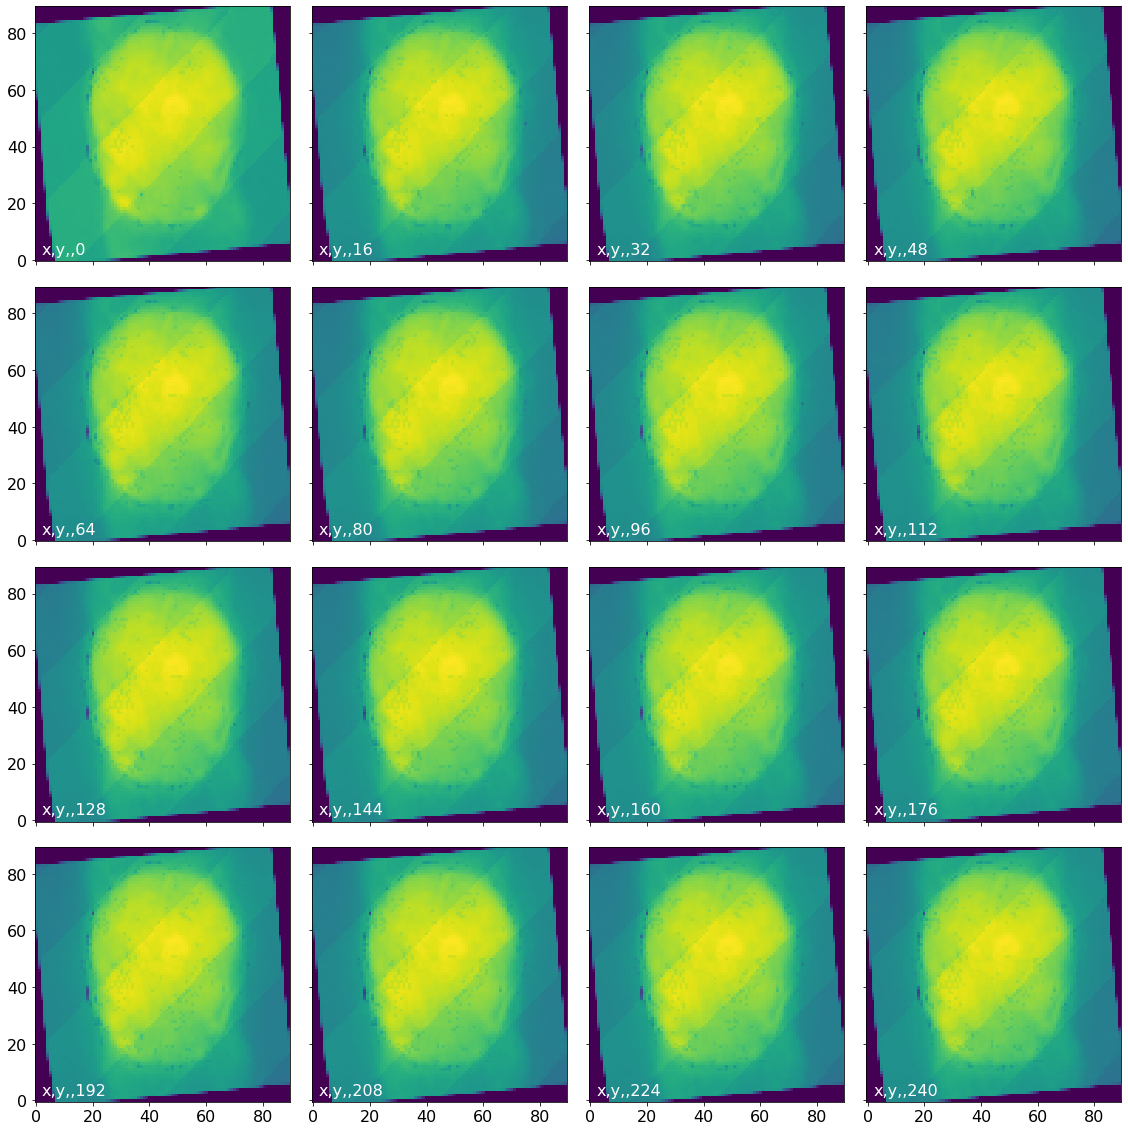

In [111]:
# X-Y projection, log
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(16, 16),
                        sharex=True, sharey=True)
i = np.random.randint(data.shape[0])
logdata = np.log(data[i] + 1e-7)

for t, ax in enumerate(axs.flatten()):
    # Taking 16-frame timesteps to try and see long term variations
    ax.imshow(logdata[:, :, :, t*16].sum(axis=2).T, origin='lower', vmin=np.log(1e-7))
    ax.text(2, 2, f'x,y,,{t*16}', color='white')
    
plt.tight_layout()

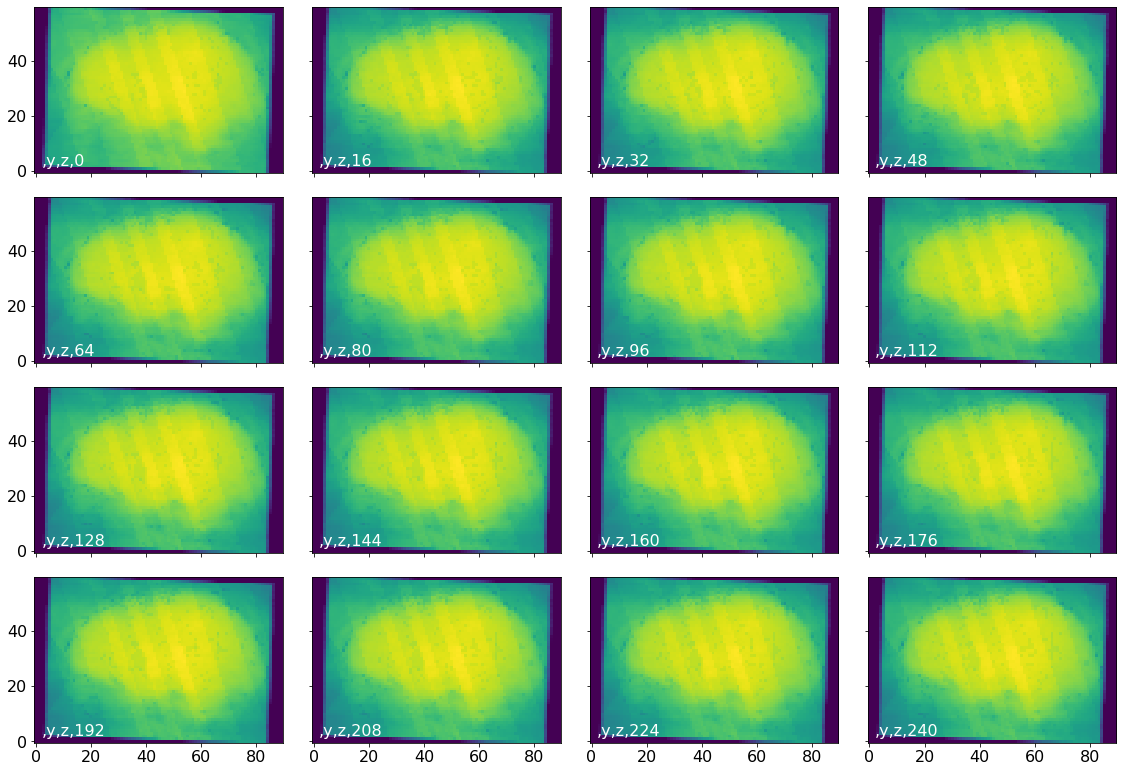

In [114]:
# Y-Z projection, log
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(16, 11),
                        sharex=True, sharey=True)
i = np.random.randint(data.shape[0])
logdata = np.log(data[i] + 1e-7)

for t, ax in enumerate(axs.flatten()):
    # Taking 16-frame timesteps to try and see long term variations
    ax.imshow(logdata[:, :, :, t*16].sum(axis=0).T, origin='lower', vmin=np.log(1e-7))
    ax.text(2, 2, f',y,z,{t*16}', color='white')
    
plt.tight_layout()

There is still not much visible time variation here, and it looks a little noisy to me (disregarding the funky edge effects for now) 

## Time animation

Doesn't work currently. Need ffmpeg installed.

## 1-D intensity distributions

I want to see how much we can crop from the images

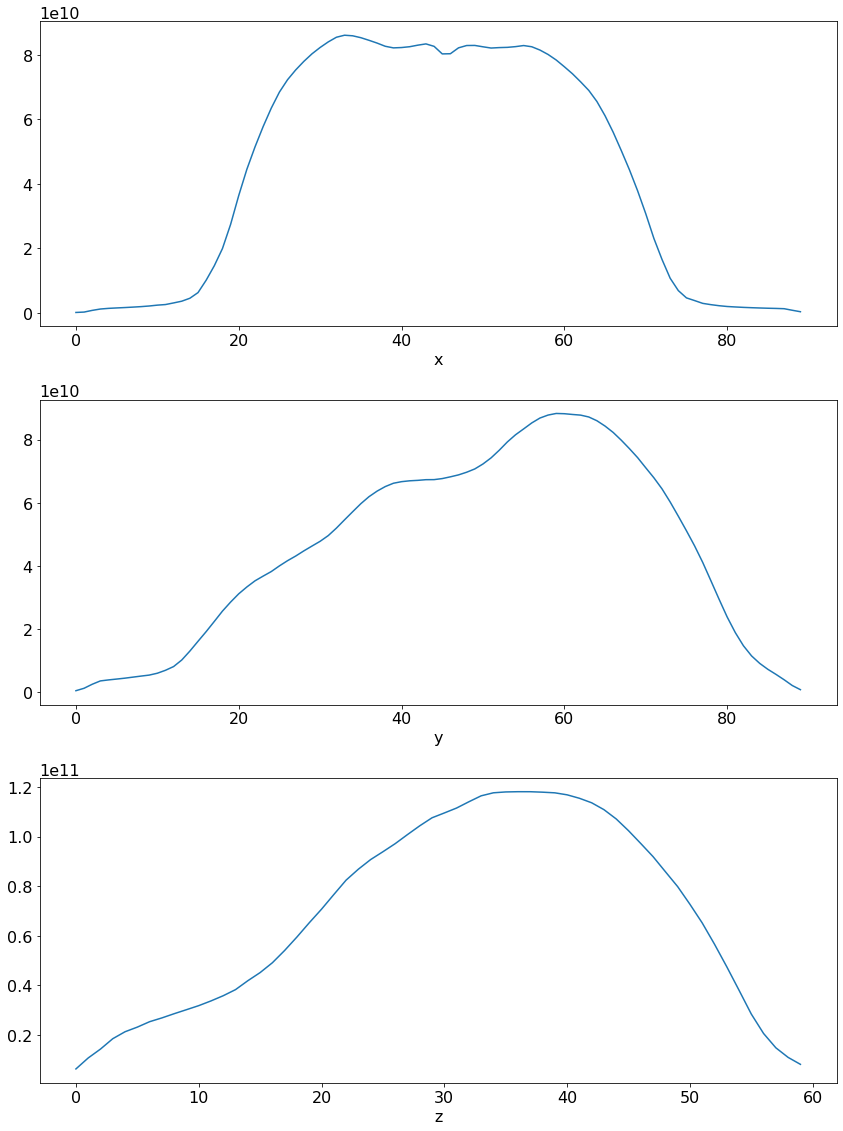

In [76]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(12, 16))

ax0.plot(data.sum(axis=(0, 2, 3, 4)))
ax0.set_xlabel('x')

ax1.plot(data.sum(axis=(0, 1, 3, 4)))
ax1.set_xlabel('y')

ax2.plot(data.sum(axis=(0, 1, 2, 4)))
ax2.set_xlabel('z')

plt.tight_layout()

## Discussion

The data is mostly non-sparse, but the voxel intensity spans several orders of magnitude. It might be interesting to use a log transform.

Also, it appears like we could get away with some constant cropping to reduce image size. From visual inspection there seem to be ~15 empty pixels on both ends of the $x$ dimension. So one could potentially reduce from (90, 90, 60) down to (60, 90, 60) easily.

The time variations in this data are nearly imperceptible. It might be very hard to learn dynamics on this dataset.